<a href="https://colab.research.google.com/github/Dragonwinner/NLP_Coursera/blob/main/Visualizing_word_frequencies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building and Visualizing word frequencies

we will focus on the build_freqs() helper function and visualizing a dataset fed into it. In our goal of tweet sentiment analysis, this function will build a dictionary where we can lookup how many times a word appears in the lists of positive or negative tweets. This will be very helpful when extracting the features of the dataset

Setup
Let's import the required libraries for this lab:

In [3]:
import nltk                                  # Python library for NLP
from nltk.corpus import twitter_samples      # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt              # visualization library
import numpy as np                           # library for scientific computing and matrix operations

nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

Import some helper functions that we provided in the utils.py file:
process_tweet(): Cleans the text, tokenizes it into separate words, removes stopwords, and converts words to stems.
build_freqs(): This counts how often a word in the 'corpus' (the entire set of tweets) was associated with a positive label 1 or a negative label 0. It then builds the freqs dictionary, where each key is a (word,label) tuple, and the value is the count of its frequency within the corpus of tweets

In [5]:
# download the stopwords for the process_tweet function
nltk.download('stopwords')

# import our convenience functions
#from utils import process_tweet, build_freqs

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


ModuleNotFoundError: ignored

In [6]:
t_p=twitter_samples.strings('positive_tweets.json')
t_n=twitter_samples.strings('negative_tweets.json')
tweets=t_p+t_n
print("Number of tweets: ", len(tweets))

Number of tweets:  10000


Next, we will build an array of labels that matches the sentiments of our tweets. This data type works pretty much like a regular list but is optimized for computations and manipulation. The labels array will be composed of 10000 elements. The first 5000 will be filled with 1 labels denoting positive sentiments, and the next 5000 will be 0 labels denoting the opposite. We can do this easily with a series of operations provided by the numpy library:

np.ones() - create an array of 1's
np.zeros() - create an array of 0's
np.append() - concatenate arrays

In [7]:
#make a numpy array representing lables of the tweets
lables=np.append(np.ones(len(t_p)),np.zeros(len(t_n)))

In [8]:
lables

array([1., 1., 1., ..., 0., 0., 0.])

In [9]:
len(lables)

10000

Dictionaries
In Python, a dictionary is a mutable and indexed collection. It stores items as key-value pairs and uses hash tables underneath to allow practically constant time lookups. In NLP, dictionaries are essential because it enables fast retrieval of items or containment checks even with thousands of entries in the collection.

In [10]:
dictionary = {'key1': 1, 'key2': 2}
# Add a new entry
dictionary['key3'] = -5

# Overwrite the value of key1
dictionary['key1'] = 0

print(dictionary)

{'key1': 0, 'key2': 2, 'key3': -5}


In [11]:
dictionary['key2']

2

In [14]:
dictionary.get('key2',-1)#dictionary.get('key8',-1)


2

In [19]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


**Word frequency dictionary**

In [25]:
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet
    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'@\w*', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean


def build_freqs(tweets,ys):
  """input:
  tweets: a list of tweets
  ys:an mX1 array with sentiment label of each tweet
  output:
  freqs:(word,sentiment):frequency"""
  yslist=np.squeeze(ys).tolist()
  freqs={}
  for y, tweet in zip(yslist, tweets):
     for word in process_tweet(tweet):
       pair=(word, y)
       if pair in freqs:
         freqs[pair]+=1
       else:
         freqs[pair]=1
  return freqs     


In [26]:
freqs=build_freqs(tweets, lables)
print(f'type(freqs)={type(freqs)}')
print(f'len(freqs)={len(freqs)}')

type(freqs)=<class 'dict'>
len(freqs)=13059


In [27]:
freqs

{('followfriday', 1.0): 25,
 ('top', 1.0): 32,
 ('engag', 1.0): 7,
 ('member', 1.0): 16,
 ('commun', 1.0): 33,
 ('week', 1.0): 83,
 (':)', 1.0): 3568,
 ('hey', 1.0): 76,
 ('jame', 1.0): 7,
 ('odd', 1.0): 2,
 (':/', 1.0): 5,
 ('pleas', 1.0): 97,
 ('call', 1.0): 37,
 ('contact', 1.0): 7,
 ('centr', 1.0): 2,
 ('02392441234', 1.0): 1,
 ('abl', 1.0): 8,
 ('assist', 1.0): 1,
 ('mani', 1.0): 33,
 ('thank', 1.0): 620,
 ('listen', 1.0): 16,
 ('last', 1.0): 47,
 ('night', 1.0): 68,
 ('bleed', 1.0): 2,
 ('amaz', 1.0): 51,
 ('track', 1.0): 5,
 ('scotland', 1.0): 2,
 ('congrat', 1.0): 21,
 ('yeaaah', 1.0): 1,
 ('yipppi', 1.0): 1,
 ('accnt', 1.0): 2,
 ('verifi', 1.0): 2,
 ('rqst', 1.0): 1,
 ('succeed', 1.0): 1,
 ('got', 1.0): 69,
 ('blue', 1.0): 9,
 ('tick', 1.0): 1,
 ('mark', 1.0): 1,
 ('fb', 1.0): 6,
 ('profil', 1.0): 2,
 ('15', 1.0): 5,
 ('day', 1.0): 246,
 ('one', 1.0): 129,
 ('irresist', 1.0): 2,
 ('flipkartfashionfriday', 1.0): 17,
 ('like', 1.0): 233,
 ('keep', 1.0): 68,
 ('love', 1.0): 400,


Table of word  counts

In [28]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

In [29]:
keys

['happi',
 'merri',
 'nice',
 'good',
 'bad',
 'sad',
 'mad',
 'best',
 'pretti',
 '❤',
 ':)',
 ':(',
 '😒',
 '😬',
 '😄',
 '😍',
 '♛',
 'song',
 'idea',
 'power',
 'play',
 'magnific']

In [30]:
data=[]

for word in keys:
  pos=0
  neg=0
  if(word,1) in freqs:
    pos=freqs[(word, 1)]
  if(word,0) in freqs:
    neg=freqs[(word,0)]
  data.append([word,pos,neg])
data


[['happi', 211, 25],
 ['merri', 1, 0],
 ['nice', 98, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3568, 2],
 [':(', 1, 4571],
 ['😒', 1, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 2, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 26, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

We can then use a scatter plot to inspect this table visually. Instead of plotting the raw counts, we will plot it in the logarithmic scale to take into account the wide discrepancies between the raw counts (e.g. :) has 3691 counts in the positive while only 2 in the negative). The red line marks the boundary between positive and negative areas. Words close to the red line can be classified as neutral.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0, flags=flags)


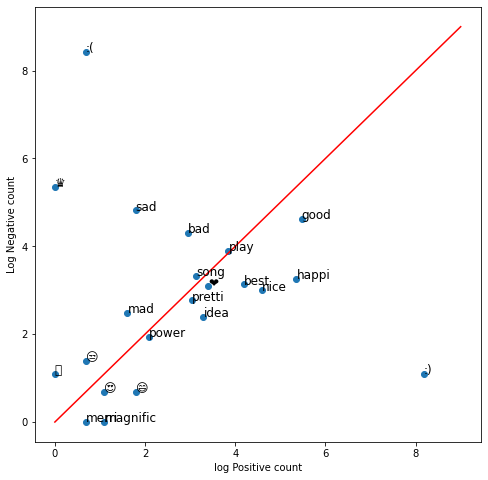

In [34]:
fig, ax=plt.subplots(figsize=(8,8))
x=np.log([x[1]+1 for x in data])
y=np.log([x[2]+1 for x in data])
ax.scatter(x,y)
plt.xlabel("log Positive count")
plt.ylabel("Log Negative count")
for i in range(0, len(data)):
  ax.annotate(data[i][0],(x[i],y[i]),fontsize=12)
ax.plot([0,9],[0,9],color='red')#Plot the red line that divides the 2 area
plt.show()  